In [3]:
!pip install interpret
!pip install lime
!pip install shap


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,  log_loss

Data Collection and Analysis


In [6]:
# loading the diabetes dataset to a pandas DataFrame
hd_dataset = pd.read_csv('XAI_Assistant_ML/data/heart_disease_data.csv')

In [7]:
hd_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# number of rows and columns in this dataset
hd_dataset.shape

(303, 14)

In [9]:
hd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# getting the statistical measures of the data
hd_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
hd_dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# Separating the data and labels

In [13]:
x = hd_dataset.drop(['target'], axis = 1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
y = hd_dataset.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

#Data Standardization

In [16]:
scaler = StandardScaler()

In [17]:
standardized_data = scaler.fit_transform(x)

In [18]:
X = standardized_data
Y = hd_dataset['target']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=42)

columns = [
    "Age",
    "Sex",
    "Chest Pain Type",
    "Resting BP",
    "Cholesterol mg/dl",
    "Fasting Blood Sugar",
    "Resting ECG",
    "Max Heart Rate",
    "Exercise Induced Angina",
    "ST Depression: ST depression",
    "Peak Exercise Slope (ST segment)",
    "Major Vessels ",
    "Thalassemia"
]

X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report
from sklearn.model_selection import learning_curve, validation_curve

class ModelEvaluator:
    def __init__(self, model, X_train, X_test, y_train, y_test):
        """
        Initialize the ModelEvaluator with the model and datasets.
        """
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.y_pred = None

    def train_and_predict(self):
        """
        Train the model and make predictions.
        """
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)

    def get_metrics(self):
        """
        Calculate and print accuracy, recall, precision, and F1-score.
        """
        if self.y_pred is None:
            print("Model is not trained yet! Please call `train_and_predict` first.")
            return

        accuracy = accuracy_score(self.y_test, self.y_pred)
        recall = recall_score(self.y_test, self.y_pred, average='binary')  # Use 'macro' or 'weighted' for multiclass
        f1 = f1_score(self.y_test, self.y_pred, average='binary')
        precision = precision_score(self.y_test, self.y_pred, average='binary')

        print(f"Accuracy: {accuracy}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"Precision: {precision}")
        print("\nClassification Report:")
        print(classification_report(self.y_test, self.y_pred))

    def plot_learning_curve(self, scoring='accuracy', cv=5):
        """
        Plot the learning curve for the model to visualize bias-variance tradeoff.
        """
        train_sizes, train_scores, test_scores = learning_curve(self.model, self.X_train, self.y_train, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
        plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="green")

        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

        plt.title("Learning Curve")
        plt.xlabel("Training Set Size")
        plt.ylabel(scoring.capitalize())
        plt.legend(loc="best")
        plt.show()

    def plot_validation_curve(self, param_name, param_range, scoring='accuracy', cv=5):
        """
        Plot the validation curve for the model to visualize bias-variance tradeoff for a specific hyperparameter.
        """
        train_scores, test_scores = validation_curve(self.model, self.X_train, self.y_train, param_name=param_name, param_range=param_range, cv=cv, scoring=scoring, n_jobs=-1)

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.plot(param_range, train_mean, label="Training Score", color="blue")
        plt.plot(param_range, test_mean, label="Cross-validation Score", color="green")

        plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
        plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

        plt.title(f"Validation Curve for {param_name}")
        plt.xlabel(param_name)
        plt.ylabel(scoring.capitalize())
        plt.legend(loc="best")
        plt.xscale('log')
        plt.show()


In [21]:
###################################################################################################################################################################

# ExplainableBoostingClassifier

In [23]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

In [24]:
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, Y_train)

ExplainableBoostingClassifier()

In [25]:

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, ebm.predict_proba(X_test)[:, 1])
print("AUC: {:.3f}".format(auc))

AUC: 0.920


In [26]:
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/2210461083424/ -->

In [27]:
show(ebm.explain_local(X_test, Y_test),0)

<!-- http://127.0.0.1:7001/2210485329728/ -->

Accuracy: 0.8524590163934426
Recall: 0.9696969696969697
F1 Score: 0.8767123287671232
Precision: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.80      0.97      0.88        33

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.85        61
weighted avg       0.87      0.85      0.85        61



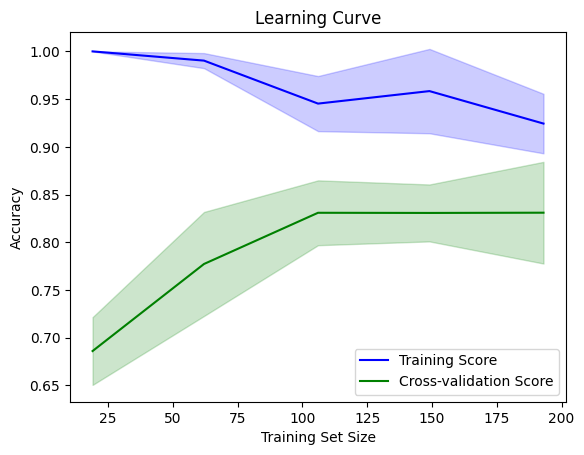

In [28]:
evaluator = ModelEvaluator(ebm, X_train, X_test, Y_train, Y_test)
evaluator.train_and_predict()  # Train the model and get predictions
evaluator.get_metrics()        # Get the classification metrics

# Plot the learning curve
evaluator.plot_learning_curve()


Training Cross-Entropy Loss: 0.280
Test Cross-Entropy Loss: 0.369


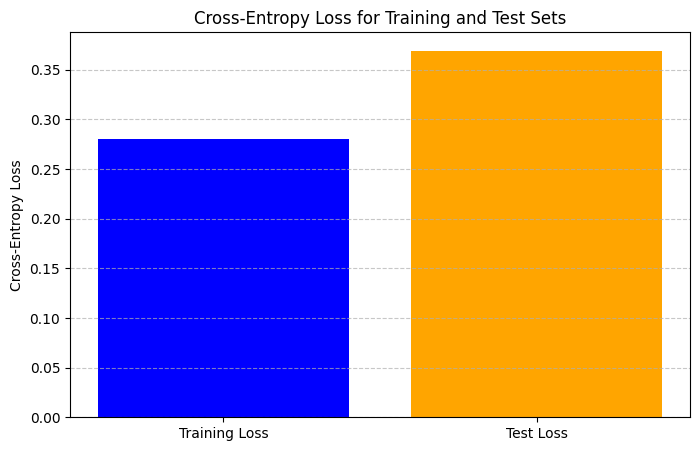

In [29]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Cross-Entropy Loss for the training set
train_pred_proba = ebm.predict_proba(X_train)
train_loss = log_loss(Y_train, train_pred_proba)

# Cross-Entropy Loss for the test set
test_pred_proba = ebm.predict_proba(X_test)
test_loss = log_loss(Y_test, test_pred_proba)

print(f"Training Cross-Entropy Loss: {train_loss:.3f}")
print(f"Test Cross-Entropy Loss: {test_loss:.3f}")

# Plot Cross-Entropy Loss for Training and Test
plt.figure(figsize=(8, 5))
plt.bar(['Training Loss', 'Test Loss'], [train_loss, test_loss], color=['blue', 'orange'])
plt.title("Cross-Entropy Loss for Training and Test Sets")
plt.ylabel("Cross-Entropy Loss")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [30]:
################################################################################################################################################################

# Local Interpretable Model-agnostic Explanations (LIME)

In [32]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import LimeTabular

In [33]:
seed = 42
np.random.seed(seed)

pca = PCA()
rf = RandomForestClassifier(random_state=seed)

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, Y_train)

Pipeline(steps=[('pca', PCA()),
                ('rf', RandomForestClassifier(random_state=42))])

In [34]:
lime = LimeTabular(blackbox_model, X_train)

Accuracy: 0.819672131147541
Recall: 0.9393939393939394
F1 Score: 0.8493150684931506
Precision: 0.775

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



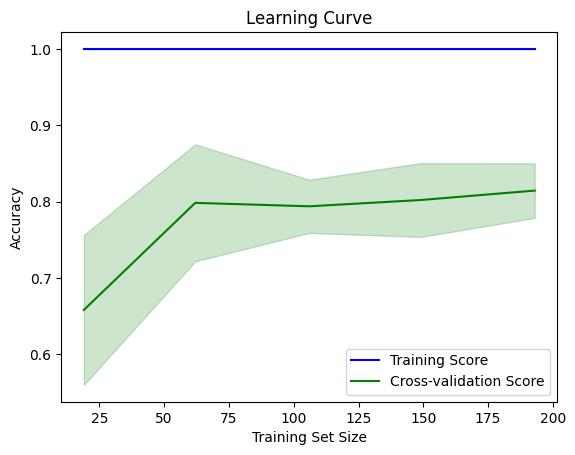

In [35]:
evaluator = ModelEvaluator(blackbox_model, X_train, X_test, Y_train, Y_test)
evaluator.train_and_predict()  # Train the model and get predictions
evaluator.get_metrics()        # Get the classification metrics

# Plot the learning curve
evaluator.plot_learning_curve()


In [36]:
show(lime.explain_local(X_test[:5], Y_test[:5]), 0)

<!-- http://127.0.0.1:7001/2210530724992/ -->

In [37]:
#########################################################################################################################################################################################

# Classification Tree

In [39]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from interpret.glassbox import ClassificationTree
from interpret import show

seed = 42
np.random.seed(seed)


In [40]:

dt = ClassificationTree(random_state=seed)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)


In [41]:

auc = roc_auc_score(Y_test, dt.predict_proba(X_test)[:, 1])
print("AUC: {:.3f}".format(auc))

AUC: 0.818


In [42]:
show(dt.explain_global())

<!-- http://127.0.0.1:7001/2210530722352/ -->

In [43]:
evaluator = ModelEvaluator(dt, X_train, X_test, Y_train, Y_test)
evaluator.train_and_predict()  # Train the model and get predictions
evaluator.get_metrics()        # Get the classification metrics


Accuracy: 0.7540983606557377
Recall: 0.8181818181818182
F1 Score: 0.782608695652174
Precision: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [44]:
#######################################################################################################################################################################################

# SHAP

(Blackbox model)

In [46]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import ShapKernel

In [47]:
seed = 42
np.random.seed(seed)

pca = PCA()
rf = RandomForestClassifier(random_state=seed)

In [48]:
blackbox_model_shap = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model_shap.fit(X_train, Y_train)

Pipeline(steps=[('pca', PCA()),
                ('rf', RandomForestClassifier(random_state=42))])

In [49]:
shap = ShapKernel(blackbox_model_shap, X_train)
shap_local = shap.explain_local(X_test[:5], Y_test[:5])

C:\Users\sudhi\Downloads\Sagar_Pathak\IIT_Bhilai\ML\XAI_assistant_ML\XAI_Assistant_ML\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Using 242 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:10<00:00, 14.04s/it]


In [50]:
show(shap_local, 0)

<!-- http://127.0.0.1:7001/2210589495168/ -->

Accuracy: 0.819672131147541
Recall: 0.9393939393939394
F1 Score: 0.8493150684931506
Precision: 0.775

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



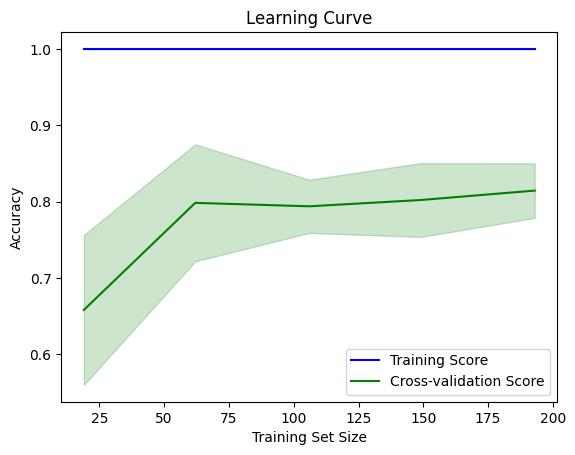

In [51]:
evaluator = ModelEvaluator(blackbox_model_shap, X_train, X_test, Y_train, Y_test)
evaluator.train_and_predict()  # Train the model and get predictions
evaluator.get_metrics()        # Get the classification metrics

# Plot the learning curve
evaluator.plot_learning_curve()

In [52]:
###########################################################################################################################################################################

# Linear Model

In [54]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from interpret.glassbox import LogisticRegression
from interpret import show


In [55]:
seed = 42
np.random.seed(seed)
lr = LogisticRegression(max_iter=3000, random_state=seed)
lr.fit(X_train, Y_train)

In [56]:
auc = roc_auc_score(Y_test, lr.predict_proba(X_test)[:, 1])
print("AUC: {:.3f}".format(auc))

AUC: 0.869


In [57]:
evaluator = ModelEvaluator(lr, X_train, X_test, Y_train, Y_test)
evaluator.train_and_predict()  # Train the model and get predictions
evaluator.get_metrics()        # Get the classification metrics


Accuracy: 0.8032786885245902
Recall: 0.9090909090909091
F1 Score: 0.8333333333333334
Precision: 0.7692307692307693

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [58]:
show(lr.explain_global())


<!-- http://127.0.0.1:7001/2210530852592/ -->

# Export the model



In [60]:
import pickle
filename = "heart_disease_model.sav"
pickle.dump(ebm,open(filename,"wb"))